# Visualizing the Carbon Footprint Gap
> Are the rich responsible for a majority of the CO2 emissions? 

- title: Visualizing the Carbon Footprint Gap
- toc: true
- categories: []
- image: /images/co2.jpg
- type: pbl

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [114]:
# creating sqlite table
import sqlite3
from sqlite3 import Error
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)

    return conn
def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
def main():
    database = "instance/energy.db"

    sql_create_projects_table = """ CREATE TABLE IF NOT EXISTS energy (
                                        id PRIMARY KEY,
                                        country text NOT NULL,
                                        e_type text NOT NULL,
                                        year integer NOT NULL,
                                        gdp integer NOT NULL, 
                                        CO2_emission
                                    ); """
    sql_create_temp_table = """ CREATE TABLE IF NOT EXISTS temp (
                                        country text NOT NULL,
                                        e_type text NOT NULL,
                                        year integer NOT NULL,
                                        gdp integer NOT NULL, 
                                        CO2_emission
                                    ); """

    # create a database connection
    conn = create_connection(database)

    # create tables
    if conn is not None:
        # create projects table
        create_table(conn, sql_create_projects_table)
        create_table(conn, sql_create_temp_table)
    else:
        print("Error! cannot create the database connection.")
if __name__ == '__main__':
    main()

In [95]:
import pandas as pd 

df = pd.read_csv('files/energy.csv', usecols = ['Country','Energy_type','Year','GDP','CO2_emission' ])
df.to_csv('files/energy1.csv')

In [116]:
# Populate
import sqlite3 as sq
import pandas as pd

connection = sq.connect('instance/energy.db')
 
# Create a cursor object
curs = connection.cursor()
 
student = pd.read_csv('files/energy1.csv')
 
# Write the data to a sqlite db table
student.to_sql('energy', connection, if_exists='replace', index=False)
   
# Run select sql query
curs.execute('select * from energy')
 
# Fetch all records
# as list of tuples
records = curs.fetchall()
     
# Close connection to SQLite database
connection.close()

In [121]:
import sqlite3

# connect to the database

conn = sqlite3.connect('instance/energy.db')



# create a cursor object
cursor = conn.cursor()

# execute a SELECT query to retrieve all rows from the energy table

cursor.execute("DELETE FROM energy WHERE Country = 'World'")

# commit the changes to the database
conn.commit()

# close the cursor and connection
cursor.close()
conn.close()


In [127]:
# x-val list
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('instance/energy.db')
c = conn.cursor()

# Execute SQL query to retrieve column data
c.execute("SELECT GDP FROM energy")

# Fetch all rows and store column data in a list
x_list = [row[0] for row in c.fetchall()]

# Close database connection
conn.close()


In [128]:
# y val list
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('instance/energy.db')
c = conn.cursor()

# Execute SQL query to retrieve column data
c.execute("SELECT CO2_emission FROM energy")

# Fetch all rows and store column data in a list
y_list = [row[0] for row in c.fetchall()]

# Close database connection
conn.close()

In [138]:
# y val list
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('instance/energy.db')
c = conn.cursor()

# Execute SQL query to retrieve column data
c.execute("SELECT Country FROM energy")

# Fetch all rows and store column data in a list
c_list = [row[0] for row in c.fetchall()]

# Close database connection
conn.close()

                 Country        GDP  CO2 Emissions
0            Afghanistan   79.45460       9.391163
1                Albania   38.26840       4.031302
2                Algeria  509.06600     145.987969
3                 Angola  193.82600      17.644577
4    Antigua and Barbuda    2.12893       0.734889
..                   ...        ...            ...
195            Venezuela  190.14720     131.485055
196              Vietnam  915.50400     241.806422
197                Yemen   53.08380       8.292505
198               Zambia  247.18190       7.096290
199             Zimbabwe   37.62040       8.964759

[200 rows x 3 columns]


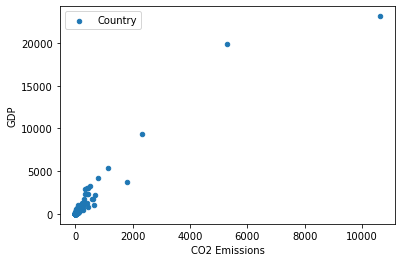

In [140]:
# import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# create a dataframe
endb = {
    "Country": c_list,
	"GDP": x_list,
	"CO2 Emissions": y_list
}

df = pd.DataFrame(endb)
print(df)

# to plot the graph
df.plot(y="GDP", x="CO2 Emissions", kind="scatter", label = "Country")
plt.show()


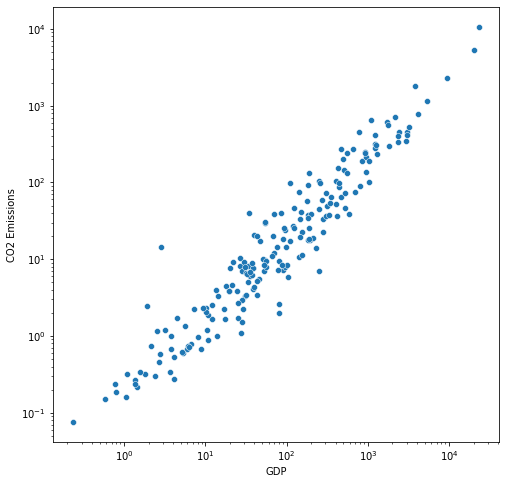

In [166]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns

endb = {
    "Country": c_list,
	"GDP": x_list,
	"CO2 Emissions": y_list
}
# Control figure size for this notebook:
plt.rcParams['figure.figsize'] = [8, 8]

# data 
data = pd.DataFrame(endb)
 
# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, x="GDP", y="CO2 Emissions",   legend=False, sizes=(20, 2000))
plt.xscale('log')
plt.yscale('log')
# show the graph
plt.show()

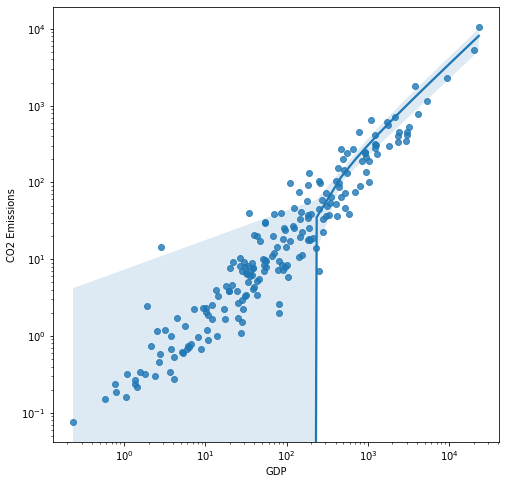

In [167]:
import seaborn as sns
import pandas as pd

endb = {
    "Country": c_list,
	"GDP": x_list,
	"CO2 Emissions": y_list
}
# Load the data

data = pd.DataFrame(endb)

# Create a scatter plot with country as hue
scatter_plot = sns.regplot(data=data, x="GDP", y="CO2 Emissions")
plt.xscale('log')
plt.yscale('log')
# Add the country name as a tooltip when hovering over each point


